In [1]:
import pandas as pd
import numpy as np
import glob
import xml.etree.ElementTree as ET 
from PIL import Image

## Please note that this file was run in the Kaggle environment due to computing limitations.

In [2]:
# change the path for different folder locations
folder_path = "../input/face-mask-detection/"
path = folder_path + "annotations/"
path_images =  folder_path +"images/"
data = {"xmin":[], "ymin":[], "xmax":[], "ymax":[], "name":[], "file":[], "width":[], "height":[]}
for anno in glob.glob(path+"/*.xml"):
    tree = ET.parse(anno)
    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))    

        if 'object' in elem.tag:
            for attr in list(elem): 
                if 'name' in attr.tag:
                    name = attr.text                 
                    data['name']+=[name]
                    data['width']+=[width]
                    data['height']+=[height] 
                    data['file']+=[anno.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            data['xmin']+=[xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            data['ymin']+=[ymin]                                
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            data['xmax']+=[xmax]                                
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            data['ymax']+=[ymax]

In [3]:
os.mkdir("./train_data")
os.mkdir("./train_data/images")
os.mkdir("./train_data/labels")
os.mkdir("./train_data/images/train")
os.mkdir("./train_data/images/val")
os.mkdir("./train_data/labels/train")
os.mkdir("./train_data/labels/val")

In [4]:
data = pd.DataFrame(data)
target_transform = {'with_mask':0,'without_mask':1,'mask_weared_incorrect':2}
data['name'] = (pd.Series(data['name'])).map(target_transform)

In [5]:
unique_file_name = data['file'].unique()
random.seed(1234)
test_data_index = random.sample(range(len(unique_file_name)), int(len(unique_file_name)/5))
idx = set(test_data_index)
train_file_name, test_file_name = [], []
for i, e in enumerate(unique_file_name):
    (train_file_name,test_file_name)[i in idx].append(e)

In [6]:
len(train_file_name)

683

In [7]:
len(test_file_name)

170

In [8]:
data.head()

,xmin,ymin,xmax,ymax,name,file,width,height
0,28,55,46,71,0,maksssksksss737,400,226
1,98,62,111,78,0,maksssksksss737,400,226
2,159,50,193,90,2,maksssksksss737,400,226
3,293,59,313,80,0,maksssksksss737,400,226
4,352,51,372,72,0,maksssksksss737,400,226


In [9]:
data[data['file'] == 'maksssksksss410']['name'].tolist()

[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
for name in train_file_name:
    name_label = data[data['file'] == name]
    with open("./train_data/labels/train/"+name+".txt","w") as r:
        xmin_list = name_label['xmin'].tolist(); ymin_list = name_label['ymin'].tolist(); xmax_list = name_label['xmax'].tolist()
        ymax_list = name_label['ymax'].tolist(); image_width_list = name_label['width'].tolist(); image_height_list = name_label['height'].tolist()
        for i in range(len(name_label)):
            xmin = xmin_list[i]; ymin = ymin_list[i]; xmax = xmax_list[i];
            ymax = ymax_list[i]; image_width = image_width_list[i]; image_height = image_height_list[i]
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            r.write(str(name_label['name'].tolist()[i]))
            r.write(" ")
            r.write(str(x_center_norm))
            r.write(" ")
            r.write(str(y_center_norm))
            r.write(" ")
            r.write(str(width_norm))
            r.write(" ")
            r.write(str(height_norm))
            r.write("\n")

In [11]:
train_file_name[0:5]

['maksssksksss737',
 'maksssksksss410',
 'maksssksksss537',
 'maksssksksss295',
 'maksssksksss771']

In [12]:
# check label format
with open("./train_data/labels/train/maksssksksss802.txt","r") as f:
    print(f.read())

0 0.12 0.07116104868913857 0.06 0.0749063670411985
0 0.3575 0.1704119850187266 0.05 0.07865168539325842
0 0.4775 0.3089887640449438 0.055 0.08614232209737828
0 0.82 0.3464419475655431 0.08 0.12359550561797752



In [13]:
for name in test_file_name:
    name_label = data[data['file'] == name]
    with open("./train_data/labels/val/"+name+".txt","w") as r:
        xmin_list = name_label['xmin'].tolist(); ymin_list = name_label['ymin'].tolist(); xmax_list = name_label['xmax'].tolist()
        ymax_list = name_label['ymax'].tolist(); image_width_list = name_label['width'].tolist(); image_height_list = name_label['height'].tolist()
        for i in range(len(name_label)):
            xmin = xmin_list[i]; ymin = ymin_list[i]; xmax = xmax_list[i];
            ymax = ymax_list[i]; image_width = image_width_list[i]; image_height = image_height_list[i]
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            r.write(str(name_label['name'].tolist()[i]))
            r.write(" ")
            r.write(str(x_center_norm))
            r.write(" ")
            r.write(str(y_center_norm))
            r.write(" ")
            r.write(str(width_norm))
            r.write(" ")
            r.write(str(height_norm))
            r.write("\n")

In [14]:
# check label format
with open("./train_data/labels/val/maksssksksss234.txt","r") as f:
    print(f.read())

0 0.49375 0.28 0.1125 0.20444444444444446
0 0.29375 0.47333333333333333 0.0275 0.04888888888888889
0 0.01875 0.35777777777777775 0.0225 0.07555555555555556
0 0.985 0.5666666666666667 0.03 0.04888888888888889
0 0.86625 0.58 0.0275 0.04888888888888889



In [15]:
test_file_name[0:5]

['maksssksksss234',
 'maksssksksss70',
 'maksssksksss224',
 'maksssksksss209',
 'maksssksksss134']

In [16]:
import shutil
path = "../input/face-mask-detection/images"
train_label_path= './train_data/labels/train/'
test_laebl_path = './train_data/labels/val/'
for name in os.listdir(train_label_path):
    image_path = os.path.join(path,name[:-4]+'.png')
    shutil.copy2(image_path,"./train_data/images/train/"+name[:-4]+'.png')
for name in os.listdir(test_laebl_path):
    image_path = os.path.join(path,name[:-4]+'.png')
    shutil.copy2(image_path,"./train_data/images/val/"+name[:-4]+'.png')

In [17]:
os.listdir('./train_data/images/train/')[0:5]

['maksssksksss482.png',
 'maksssksksss15.png',
 'maksssksksss819.png',
 'maksssksksss665.png',
 'maksssksksss175.png']

In [18]:
os.listdir('./train_data/labels/train')[0:5]

['maksssksksss515.txt',
 'maksssksksss798.txt',
 'maksssksksss414.txt',
 'maksssksksss150.txt',
 'maksssksksss536.txt']

import shutil
path = "../working/cropped_images"
for images in os.listdir(path):
    image_path = os.path.join(path,images)
    #print(images)
    if str(images) in train['cropped_image'].tolist():
        shutil.copy(image_path,"./train_data/images/train/"+images)
    else:
        shutil.copy(image_path,"./train_data/images/val/"+images)

In [19]:
len(os.listdir("./train_data/images/train/"))

683

In [20]:
len(os.listdir("./train_data/labels/train/"))

683

In [21]:
len(os.listdir("./train_data/images/val/"))

170

In [22]:
len(os.listdir("./train_data/labels/val/"))

170

In [23]:
with open("/kaggle/working/data.yaml","w") as f:
    f.write("train: ")
    f.write("/kaggle/working/train_data/images/train/")
    f.write("\n")
    f.write("val: ")
    f.write("/kaggle/working/train_data/images/val/")
    f.write("\n")
    f.write("nc: ")
    f.write(" 3")
    f.write("\n")
    f.write("names: ")
    f.write(" ['with_mask','without_mask','mask_weared_incorrect']")
    
    

In [24]:
with open("/kaggle/working/data.yaml","r") as f:
    print(f.read())

train: /kaggle/working/train_data/images/train/
val: /kaggle/working/train_data/images/val/
nc:  3
names:  ['with_mask','without_mask','mask_weared_incorrect']


In [25]:
os.listdir('./train_data/images/train/')[0:10]

['maksssksksss482.png',
 'maksssksksss15.png',
 'maksssksksss819.png',
 'maksssksksss665.png',
 'maksssksksss175.png',
 'maksssksksss729.png',
 'maksssksksss774.png',
 'maksssksksss748.png',
 'maksssksksss367.png',
 'maksssksksss471.png']

In [26]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12462, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12462 (delta 0), reused 3 (delta 0), pack-reused 12459
Receiving objects: 100% (12462/12462), 11.60 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (8678/8678), done.
/kaggle/working/yolov5
Note: you may need to restart the kernel to use updated packages.


In [27]:
!python train.py --img 640 --batch 32 --epochs 15 --data /kaggle/working/data.yaml --weights yolov5s.pt --cache 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
100%|██████████████████████████████████████| 14.0M/14.0M [00:00<00:00, 41.0MB/s]

train: Scanning '/kaggle/working/train_data/labels/train' images and labels...68
train: Caching images (0.6GB ram): 100%|██████████| 683/683 [00:08<00:00, 77.38i
val: Scanning '/kaggle/working/train_data/labels/val' images and labels...170 fo
val: Caching images (0.1GB ram): 100%|██████████| 170/170 [00:03<00:00, 53.08it/
      0/14     7.61G    0.1055   0.05902   0.03171        74       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
      1/14     7.61G   0.08182   0.05253   0.02059        76       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
      2/14     7.61G   0.08542   0.04209   0.01786       113       640: 

In [28]:
os.listdir('/kaggle/working/yolov5/runs/train/exp/')[0:10]

['val_batch1_labels.jpg',
 'R_curve.png',
 'train_batch2.jpg',
 'val_batch2_labels.jpg',
 'weights',
 'val_batch1_pred.jpg',
 'F1_curve.png',
 'labels_correlogram.jpg',
 'val_batch0_labels.jpg',
 'results.png']

In [29]:
os.listdir('/kaggle/working/train_data/images/val')[0:10]

['maksssksksss548.png',
 'maksssksksss274.png',
 'maksssksksss450.png',
 'maksssksksss815.png',
 'maksssksksss157.png',
 'maksssksksss754.png',
 'maksssksksss174.png',
 'maksssksksss269.png',
 'maksssksksss125.png',
 'maksssksksss390.png']

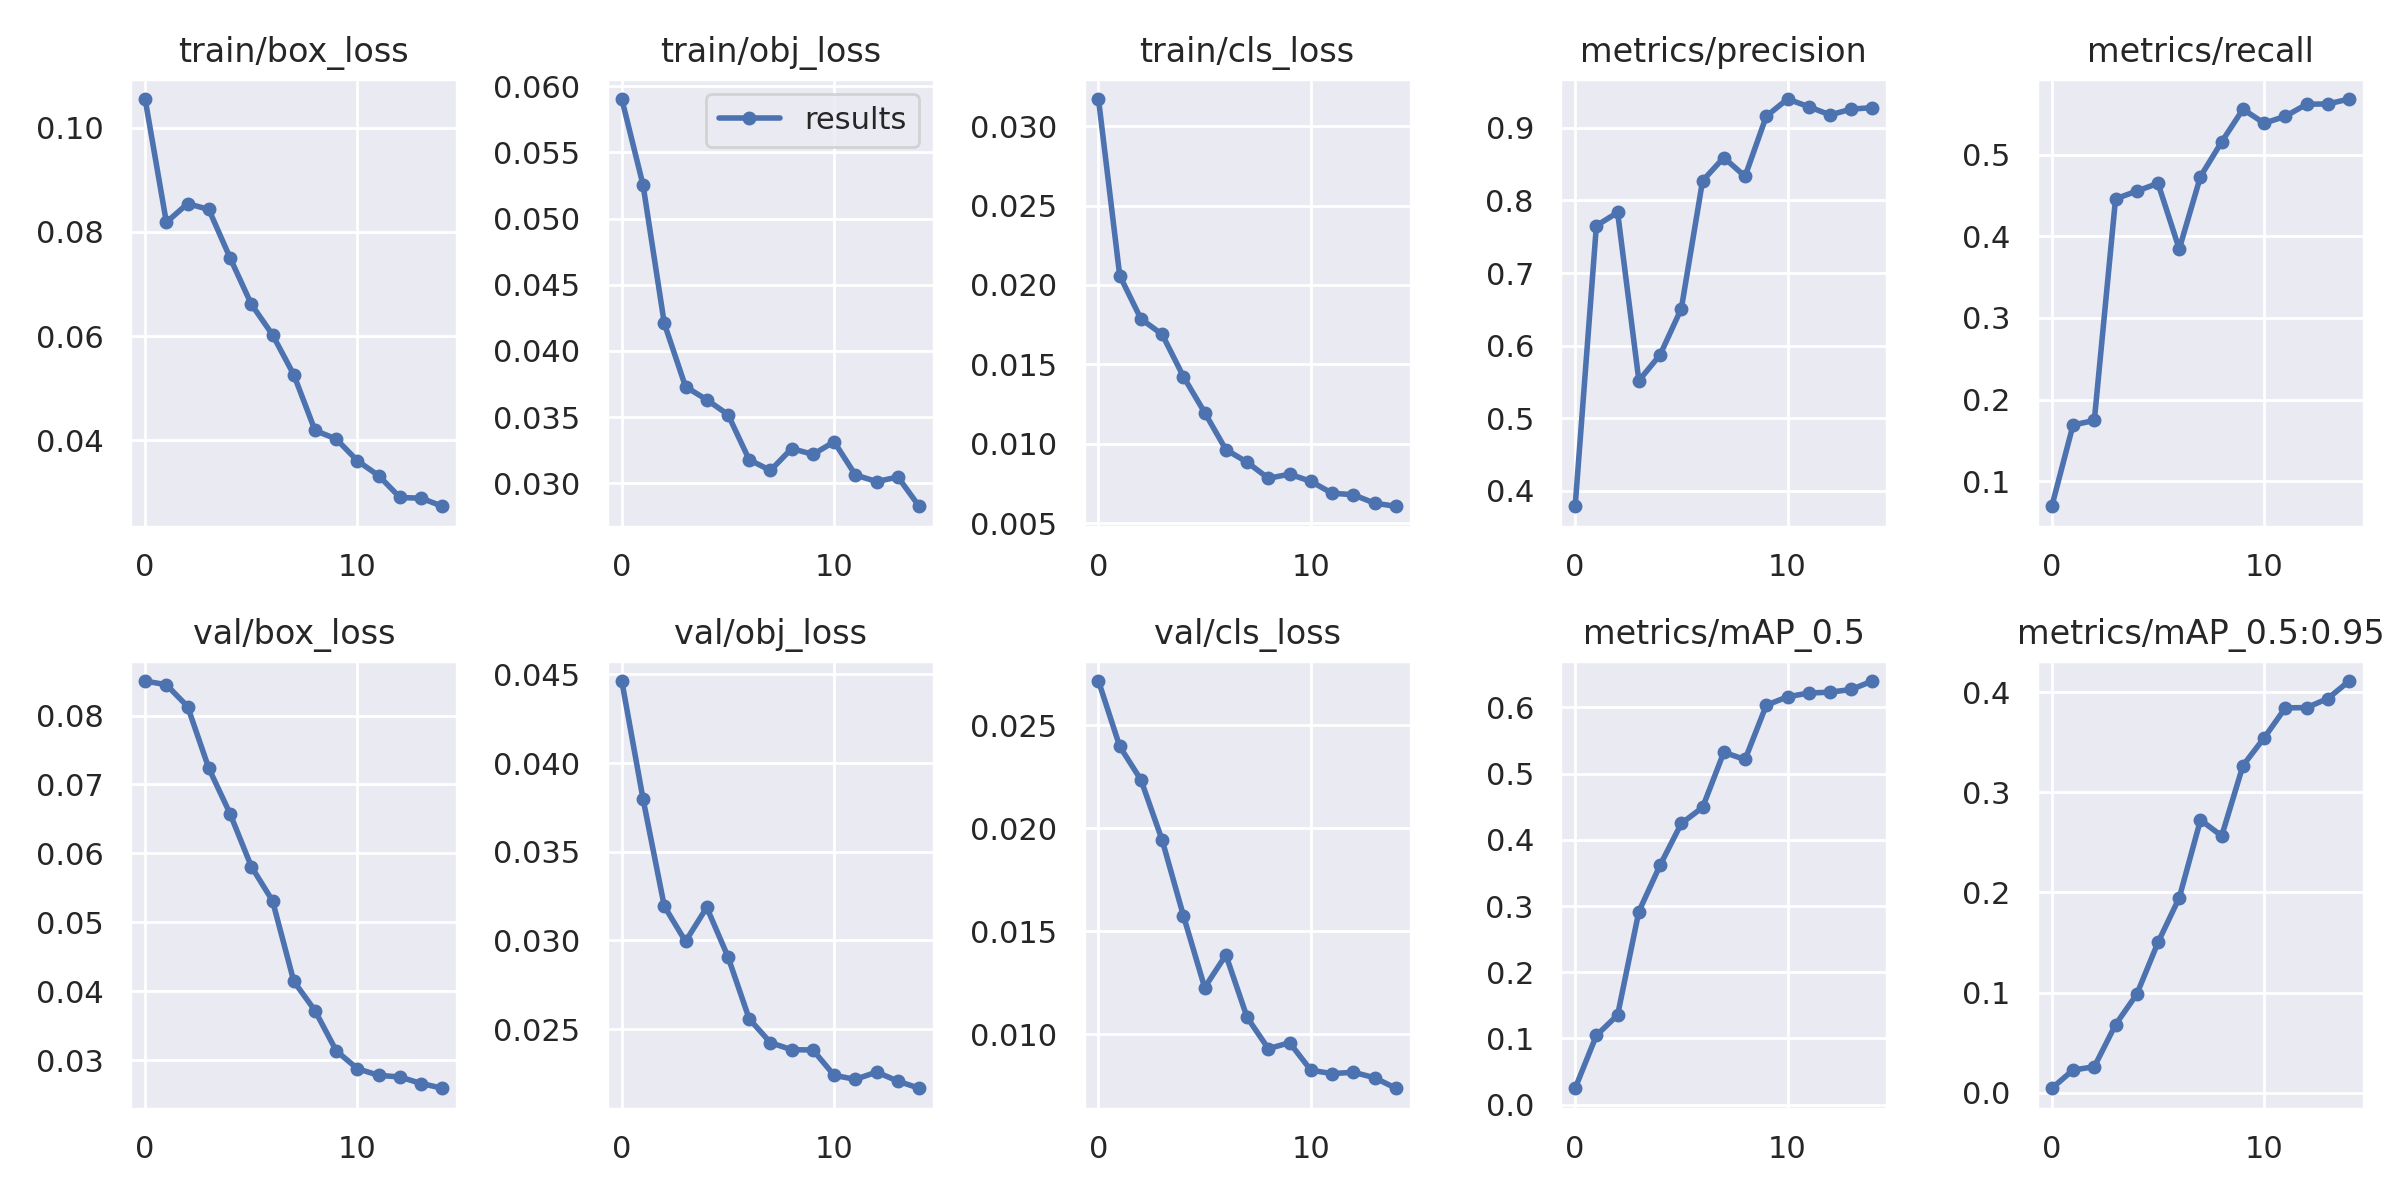

In [30]:
# display detected images
from IPython.display import Image
Image('/kaggle/working/yolov5/runs/train/exp/results.png')

In [31]:
!python detect.py --source /kaggle/working/train_data/images/val --img-size 320 --conf 0.4 --weights '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'

In [32]:
pd.read_csv('/kaggle/working/yolov5/runs/train/exp/results.csv')

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.105470,0.059021,0.031707,0.37846,0.069307,0.024803,0.004606,0.085006,0.044624,0.027147,0.002100,0.002100,0.081100
1,1,0.081821,0.052531,0.020594,0.76525,0.168870,0.104530,0.022792,0.084466,0.037977,0.023973,0.004016,0.004016,0.061016
2,2,0.085421,0.042088,0.017864,0.78355,0.174370,0.135420,0.026058,0.081309,0.031933,0.022345,0.005642,0.005642,0.040642
3,3,0.084285,0.037307,0.016890,0.55167,0.445850,0.291660,0.068085,0.072333,0.029945,0.019414,0.006977,0.006977,0.019977
4,4,0.075016,0.036317,0.014232,0.58721,0.455350,0.361650,0.098449,0.065752,0.031861,0.015749,0.007360,0.007360,0.007360
5,5,0.066128,0.035203,0.011973,0.65096,0.464850,0.424640,0.150140,0.058092,0.029076,0.012259,0.007360,0.007360,0.007360
6,6,0.060258,0.031784,0.009637,0.82710,0.384440,0.448840,0.194740,0.053109,0.025576,0.013839,0.006700,0.006700,0.006700
7,7,0.052610,0.030983,0.008844,0.85919,0.473210,0.532050,0.272350,0.041441,0.024235,0.010806,0.006040,0.006040,0.006040
8,8,0.041911,0.032633,0.007831,0.83321,0.515760,0.521250,0.256460,0.037175,0.023837,0.009288,0.005380,0.005380,0.005380
9,9,0.040271,0.032196,0.008093,0.91612,0.555650,0.603090,0.326660,0.031344,0.023824,0.009579,0.004720,0.004720,0.004720


In [33]:
os.listdir('/kaggle/working/yolov5/runs/train/exp')[0:10]

['val_batch1_labels.jpg',
 'R_curve.png',
 'train_batch2.jpg',
 'val_batch2_labels.jpg',
 'weights',
 'val_batch1_pred.jpg',
 'F1_curve.png',
 'labels_correlogram.jpg',
 'val_batch0_labels.jpg',
 'results.png']

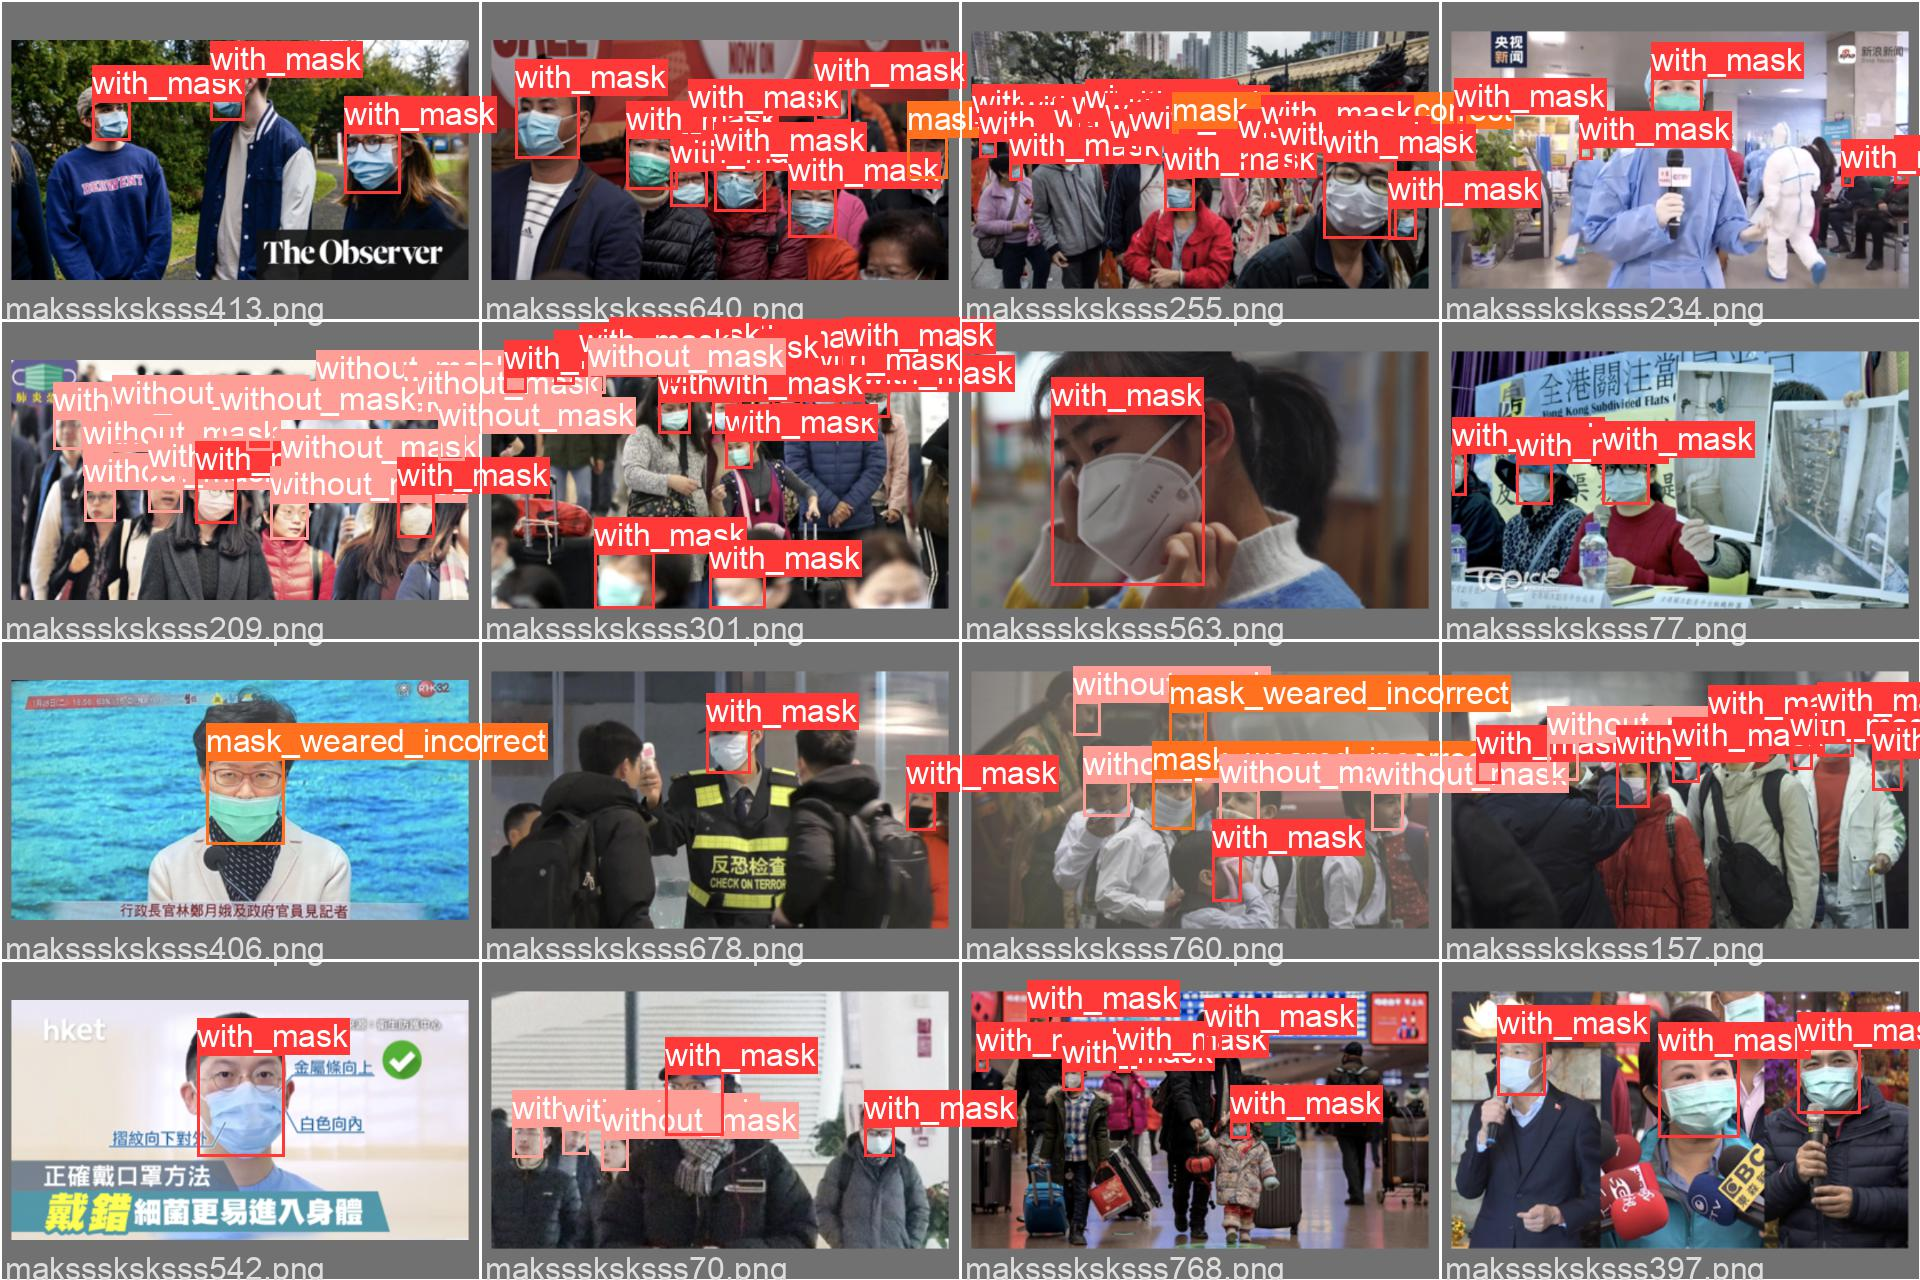

In [34]:
Image('/kaggle/working/yolov5/runs/train/exp/val_batch0_labels.jpg')

In [35]:
os.listdir('/kaggle/working/yolov5/runs/detect/exp/')[0:10]

['maksssksksss548.png',
 'maksssksksss274.png',
 'maksssksksss450.png',
 'maksssksksss815.png',
 'maksssksksss157.png',
 'maksssksksss754.png',
 'maksssksksss174.png',
 'maksssksksss269.png',
 'maksssksksss125.png',
 'maksssksksss390.png']